<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/projects/Copy_of_Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using numpy to look for a correlation between time data and sea level rise
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



In [30]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
df = pd.read_csv(url)

def sea_level():

  print(df.head())
  print(df.info())

sea_level()


   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    floa

### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

In [45]:
def sea_level():
  #numpy arrays for the sea levels by CSIRO and years
  year = df['Year'].to_numpy(np.int64)
  sea_level = df['CSIRO Adjusted Sea Level'].to_numpy(np.float64)

  #calculate some statistics on the level array
  mean = sea_level.mean()
  stand_dev = sea_level.std()
  total = sea_level.sum()
  max = sea_level.max()
  min = sea_level.min()

  print ("Total:","{:5.2f}".format(total),", Max:",max,", Min:",min,", Mean:",mean,", Stand:",stand_dev) #formating distance & 2 decimals for total calculation.

  #calculate years with the biggest/lowest rise in level
  biggest_year = np.where(sea_level == max)[0][0]
  lowest_year = np.where(sea_level == min)[0][0]
  print("The year with the biggest rise in sea level was: ", year[biggest_year],"\nThe year with the biggest rise in sea level was: ", year[lowest_year])

  #calculate coefficient
  coefficient = np.corrcoef(year, sea_level)
  print(coefficient)
  print(round(coefficient[0][1],2))

  #or alternatively use sea_level.describe() coding for a calculation summary.

sea_level()

Total: 489.15 , Max: 9.326771644 , Min: -0.440944881 , Mean: 3.650340811880598 , Stand: 2.476399631426498
The year with the biggest rise in sea level was:  2012 
The year with the biggest rise in sea level was:  1882
[[1.         0.98475713]
 [0.98475713 1.        ]]
0.98


**Visualisation of data**

Using a plot with matplotlib to display the trend in the yearly increase in sea levels.

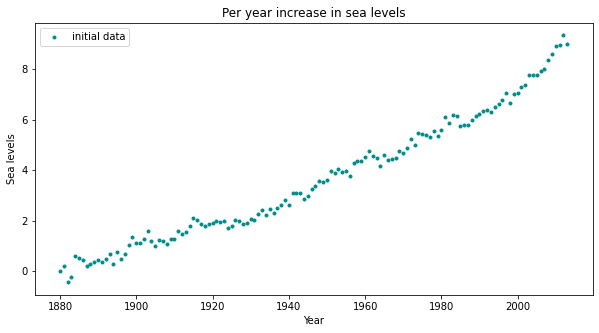

In [64]:
import matplotlib.pyplot as plt
year = df['Year'].to_numpy(np.int64)
sea_level = df['CSIRO Adjusted Sea Level'].to_numpy(np.float64)

plt.figure(figsize=(10,5))
plt.plot(year, sea_level, '.', color = 'darkcyan', label='initial data') #'.' (or '-', 'o') indicating the chr specifier/marker representing the plot trend.
plt.legend()
plt.title("Per year increase in sea levels")
plt.xlabel("Year")
plt.ylabel("Sea levels")
plt.show()

Adding a line of best fit with a linregress function imported from the scipy stats library:
- creating a regression variable and assign the result of using linregress (regression = linregress(x,y) )
- storing the slope and intercept (slope = regression.slope, intercept = regression.intercept)
- plotting a line using plt.plot(x, slope*x + intercept).

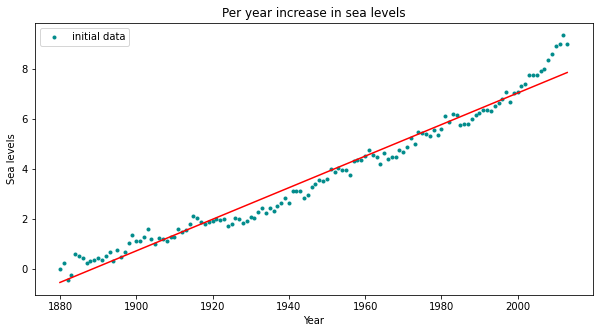

In [71]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

year = df['Year'].to_numpy(np.int64)
sea_level = df['CSIRO Adjusted Sea Level'].to_numpy(np.float64)

plt.figure(figsize=(10,5))
plt.plot(year, sea_level, '.', color = 'darkcyan', label='initial data')
plt.legend()
plt.title("Per year increase in sea levels")

#Scatterplot
#x = df['Year']
#y = df['CSIRO Adjusted Sea Level']
#plt.scatter(x,y)
#plt.scatter(x,y, '.', color = 'darkcyan', label='initial data') #error?
plt.xlabel('Year')
plt.ylabel('Sea levels')

#Adding a line of best fit
regression = linregress(x,y)
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept, 'r')
plt.show()

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Practicing old and new numpy and pandas functions.

## What caused you the most difficulty?

The [0][0] indexing.